# Simple Linear Regression (Practice)

##### Import libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

##### Import and Split Dataset

In [81]:
url = "./datasets/iris.csv"
data = pd.read_csv(url)
data

,X,Y
0,0.046955,3.952237
1,0.187898,6.370572
2,0.201075,5.968351
3,0.202184,3.969216
4,0.391878,7.467947
...,...,...
155,7.805292,25.066014
156,7.917250,25.257061
157,7.991586,24.387402
158,8.103021,25.260244


Here, we will be using 70% data for training the model and 30% data for testing our hypotheses. We will be using sepal length to determine the species of the the flower.


In [82]:
xTrain = np.array(data.X[0:112]).reshape(112,1)
xTest = np.array(data.X[112:160]).reshape(48,1)
yTrain = np.array(data.Y[0:112]).reshape(112,1)
yTest = np.array(data.Y[112:160]).reshape(48,1)

##### Define the linear regression model


In [83]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forwardPropagate(self, xTrain):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, xTrain)+c
        return predictions

    def costFunction(self, predictions, yTrain):
        cost = np.mean((yTrain-predictions)**2)
        return cost

    def backwardPropagate(self, xTrain, yTrain, predictions):
        derivatives = {}
        df = (predictions-yTrain)
        derivatives['dm'] = 2*np.mean(np.multiply(xTrain, df))
        derivatives['dc'] = 2*np.mean(df)
        return derivatives

    def updateParameters(self, derivatives, learningRate):
      self.parameters['m'] = self.parameters['m'] - \
            learningRate*derivatives['dm']
      self.parameters['c'] = self.parameters['c'] - \
            learningRate*derivatives['dc']

    def train(self, xTrain, yTrain, learningRate, iters):
        self.parameters['m'] = np.random.uniform(0, 1)*-1
        self.parameters['c'] = np.random.uniform(0, 1)*-1
        self.loss = []
        fig, ax = plt.subplots()
        xVals = np.linspace(min(xTrain), max(xTrain),50)
        line, = ax.plot(
            xVals, self.parameters['m']*xVals+self.parameters['c'], color='blue', label='Regression Line')
        ax.scatter(xTrain, yTrain, marker='o',
                   color='red', label='Training Data')
        ax.set_ylim(0, max(yTrain)+1)

        def update(frame):
            predictions = self.forwardPropagate(xTrain)
            cost = self.costFunction(predictions, yTrain)
            derivatives = self.backwardPropagate(xTrain, yTrain, predictions)
            self.updateParameters(derivatives, learningRate)
            line.set_ydata(self.parameters['m']*xVals+self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Lost = {}".format(frame+1, cost))
            return line,
        ani = FuncAnimation(fig, update, frames=iters, interval=41,blit=True)
        ani.save('linearRegression.gif', writer='ffmpeg')
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Simple Linear Regression')
        plt.legend()
        plt.show()
        return self.parameters, self.loss

##### Train the Model and Display Output

Iteration = 1, Lost = 262.544827064314
Iteration = 1, Lost = 136.46845008976726
Iteration = 1, Lost = 72.17634273352353
Iteration = 2, Lost = 39.38217178348594
Iteration = 3, Lost = 22.645882662726542
Iteration = 4, Lost = 14.09609318112579
Iteration = 5, Lost = 9.719950493368357
Iteration = 6, Lost = 7.4716902978493325
Iteration = 7, Lost = 6.308375280260411
Iteration = 8, Lost = 5.698312004713466
Iteration = 9, Lost = 5.3704405359175285
Iteration = 10, Lost = 5.186572601233276
Iteration = 11, Lost = 5.076258265439894
Iteration = 12, Lost = 5.003580788030739
Iteration = 13, Lost = 4.950228552971152
Iteration = 14, Lost = 4.906865093335556
Iteration = 15, Lost = 4.868729506808295
Iteration = 16, Lost = 4.833393535710775
Iteration = 17, Lost = 4.799618120346937
Iteration = 18, Lost = 4.766770466774389
Iteration = 19, Lost = 4.7345268663227715
Iteration = 20, Lost = 4.702721192114334
Iteration = 21, Lost = 4.6712676621087965
Iteration = 22, Lost = 4.640121463420614
Iteration = 23, Lost =

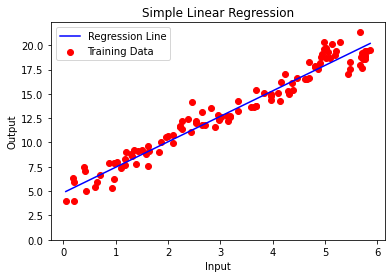

In [86]:
linearReg = LinearRegression()
parameters, loss = linearReg.train(xTrain, yTrain, 0.01, 700)